# Titanic - Survival Prediction

## Importing all Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing Datasets

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

### Dataset View

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## OVERVIEW

**Dataset statistics**
- **Number of rows: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 891**
- **Number of columns: $\;\;\;\;\;\;\;\;\;\;\;\;\;$ 12**
- **Missing values: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 866** 
- **Missing values (%): $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 8.1%**

### Number of Rows and Columns

In [4]:
train.shape

(891, 12)

### Column Names

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Column Information

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

### Checking for null values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The Age, Carbin, Embarked have null values. I will try to fix them.

**For train Dataset:**

In [9]:
#Drop column Cabin in train dataset

train.drop(columns = ["Cabin"], inplace = True)

In [10]:
#Replacing null values of Age by their respective mean in train dataset

train["Age"].fillna(train["Age"].mean(), inplace = True)

In [11]:
#Replacing null values of Embarked by mode in train dataset

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace = True)

**For test Dataset:**

In [12]:
#Drop column Cabin in test dataset

test.drop(columns = ["Cabin"], inplace = True)

In [13]:
#Replacing null values of Age and Fare columns by their respective mean in test dataset

test["Age"].fillna(test["Age"].mean(), inplace = True)
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

### Re-checking for null values

In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Mean of survived Male and Female

In [16]:
round(train.groupby(["Sex"])["Survived"].agg(["mean"]) * 100, 2)

,mean
Sex,
female,74.20
male,18.89


### Number of passengers who survived and not survived

In [17]:
# 0 means not survived
# 1 means survived

train["Survived"].agg(["value_counts"])

,value_counts
0,549
1,342


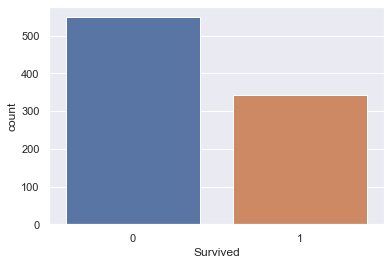

In [18]:
sns.countplot(x = train["Survived"]);

- It is evident that not many passengers survived the accident. </br> 
- Out of **891 passengers** in training set, only around **350 survived** i.e Only **38.4%** of the total training set survived the crash.

### Mean, Minimum &  Maximum Fare based on different Pclass

In [19]:
train.groupby(["Sex", "Pclass"])["Fare"].agg(["min", "max", "mean"])

min       max        mean
Sex    Pclass                               
female 1       25.9292  512.3292  106.125798
       2       10.5000   65.0000   21.970121
       3        6.7500   69.5500   16.118810
male   1        0.0000  512.3292   67.226127
       2        0.0000   73.5000   19.741782
       3        0.0000   69.5500   12.661633

### Let's Analyze Age

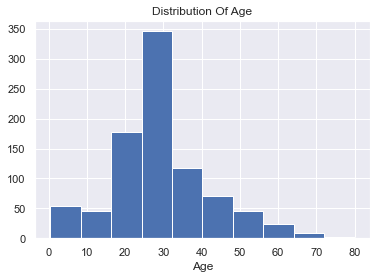

In [20]:
plt.hist(train["Age"])
plt.xlabel("Age")
plt.title("Distribution Of Age");

In [21]:
print ("Youngest Passenger's Age:", train["Age"].min(), "years")
print ("Oldest Passenger's Age  :", train["Age"].max(), "years")
print ("Average Passenger's Age :", round(train["Age"].mean(), 2), "years")

Youngest Passenger's Age: 0.42 years
Oldest Passenger's Age  : 80.0 years
Average Passenger's Age : 29.7 years


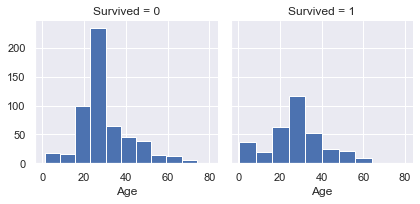

In [22]:
g = sns.FacetGrid(data = train[train["Age"].notna()], col = "Survived")
g.map(plt.hist, "Age");

###  Let's Analyze Pclass

In [23]:
train["Pclass"].agg(["value_counts"])

,value_counts
3,491
1,216
2,184


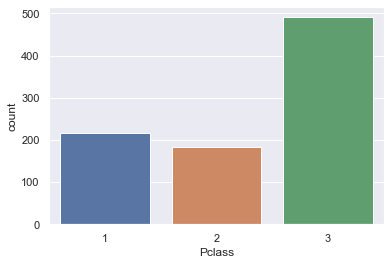

In [24]:
sns.countplot(x = train["Pclass"]);

### Number of survived and not survived passengers based on different Pclass

In [25]:
train.groupby(["Survived"])["Pclass"].agg(["value_counts"])

value_counts
Survived Pclass              
0        3                372
         2                 97
         1                 80
1        1                136
         3                119
         2                 87

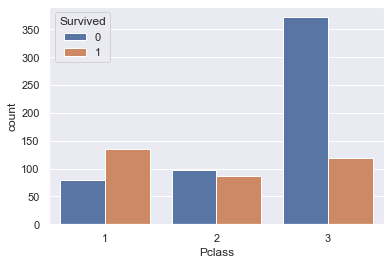

In [26]:
sns.countplot(x = "Pclass", data = train, hue = "Survived");

People say **Money Cannot Buy Everything**. But we can cleary see that passengers of **Pclass 1** were given a very high priority
during rescue. Even though the number of passengers in **Pclass 3** were a lot higher, still the number of survival from them is very low.
- Pclass 1 has **136 survived** i.e. **63%**
- Pclass 2 has **37 survived** i.e. **48%**
- Pclass 3 has **119 survived** i.e. **25%**

### Number of passengers who survived in different Pclass

In [27]:
train.groupby(["Sex", "Survived"])["Pclass"].agg(["value_counts"])

value_counts
Sex    Survived Pclass              
female 0        3                 72
                2                  6
                1                  3
       1        1                 91
                3                 72
                2                 70
male   0        3                300
                2                 91
                1                 77
       1        3                 47
                1                 45
                2                 17

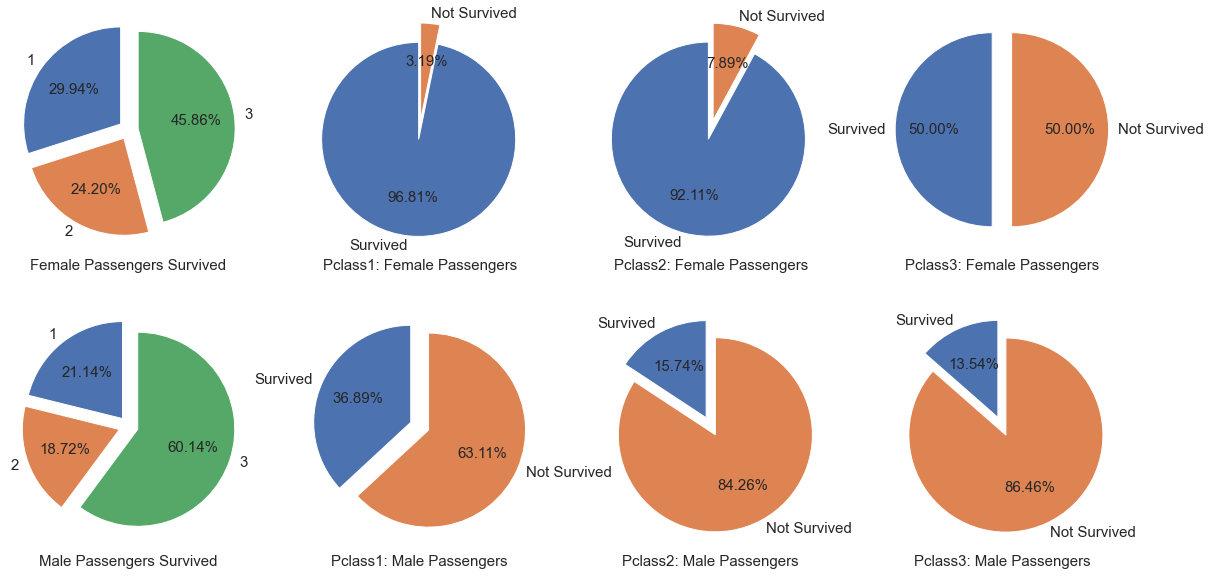

In [28]:
labels = ["Survived", "Not Survived"]
Pclass = ["1", "2", "3"]
female = [29.94, 24.20, 45.86]
male = [21.14, 18.72, 60.14]

plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.pie(female, labels = Pclass, explode = (0.1, 0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Female Passengers Survived", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 2)
plt.pie([96.81, 3.19], labels = labels, explode = (0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Pclass1: Female Passengers", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 3)
plt.pie([92.11, 7.89], labels = labels, explode = (0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Pclass2: Female Passengers", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 4)
plt.pie([50, 50], labels = labels, explode = (0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Pclass3: Female Passengers", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 5)
plt.pie(male, labels = Pclass, explode = (0.1, 0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Male Passengers Survived", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 6)
plt.pie([36.89, 63.11], labels = labels, explode = (0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Pclass1: Male Passengers", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 7)
plt.pie([15.74, 84.26], labels = labels, explode = (0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Pclass2: Male Passengers", y = -0.1, fontsize = 15)

plt.subplot(2, 4, 8)
plt.pie([13.54, 86.46], labels = labels, explode = (0.1, 0.1), autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 15})
plt.title("Pclass3: Male Passengers", y = -0.1, fontsize = 15);

- We can easily infer that survival for **Females** from **Pclass 1** is about **96-97%**, as only **3** out of **94 Females** from **Pclass 1** died.
- It is evident that irrespective of **Pclass**, **Females** were given first priority while rescue.
- Even **Males** from **Pcalss 1** have a very low survival rate.

### How many passengers survived gender-wise

In [29]:
train.groupby(["Sex"])["Survived"].agg(["value_counts"])

value_counts
Sex    Survived              
female 1                  233
       0                   81
male   0                  468
       1                  109

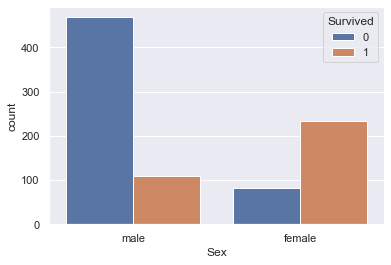

In [30]:
sns.countplot(x = "Sex", data = train, hue = "Survived");

Here we can see that **Females** survived more as compared to **Males**.

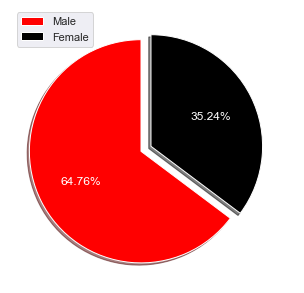

In [31]:
sex = ["Male", "Female"]
values = train["Sex"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();


Ratio of **Male** to **Female** is approx **2:1**

### Number of survived Embarked-wise

In [32]:
train.groupby(["Survived"])["Embarked"].agg(["value_counts"])

value_counts
Survived Embarked              
0        S                  427
         C                   75
         Q                   47
1        S                  219
         C                   93
         Q                   30

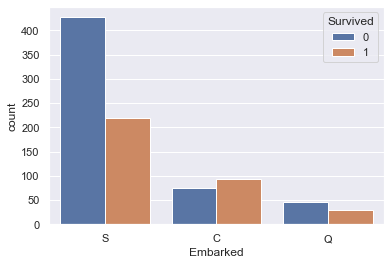

In [33]:
sns.countplot(x = "Embarked", data = train, hue = "Survived");

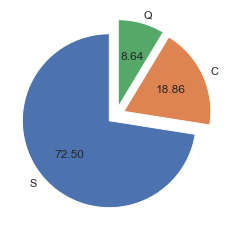

In [34]:
plt.pie(train["Embarked"].value_counts(), labels = train["Embarked"].unique(), explode = (0.1, 0.1, 0.1), autopct = "%.2f", startangle = 90);

## Model Implementation

### Label Encoding

**For train Dataset:**

In [35]:
print (train["Sex"].unique())

#Replacing female as 0 and male as 1 in Sex column in train dataset

train["Sex"] = train["Sex"].map({"female":0, "male":1})
print (train["Sex"].unique())

['male' 'female']
[1 0]


In [36]:
print (train["Embarked"].unique())

#Replacing C as 0, Q as 1, S as 2 in Embarked column in train dataset

train["Embarked"] = train["Embarked"].map({"C":0, "Q":1, "S":2})
print (train["Embarked"].unique())

['S' 'C' 'Q']
[2 0 1]


**For test Dataset:**

In [37]:
print (test["Sex"].unique())

#Replacing female as 0 and male as 1 in Sex column in test dataset

test["Sex"] = test["Sex"].map({"female":0, "male":1})
print (test["Sex"].unique())

['male' 'female']
[1 0]


In [38]:
print (test["Embarked"].unique())

#Replacing C as 0, Q as 1, S as 2 in Embarked column in test dataset

test["Embarked"] = test["Embarked"].map({"C":0, "Q":1, "S":2})
print (train["Embarked"].unique())

['Q' 'S' 'C']
[2 0 1]


### Define the Dependent and the Independent Variables

In [39]:
test_ids = test["PassengerId"].values

In [40]:
train.drop(columns = ["PassengerId", "Name", "SibSp", "Parch", "Ticket"], inplace = True)
test.drop(columns = ["PassengerId", "Name", "SibSp", "Parch", "Ticket"], inplace = True)

In [41]:
X = train.drop(columns = ["Survived"])
y = train["Survived"]

### Scaling of Data using MinMaxScaler

In [42]:
x_scaled = StandardScaler()
x_scaled = x_scaled.fit_transform(X)

### Training the Data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 36)

In [44]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(x_test)

### Accuracy score

In [46]:
acc = accuracy_score(y_test, y_pred)
acc

0.8246268656716418

### F1 Score 

In [47]:
f1 = f1_score(y_test, y_pred)
f1

0.7793427230046949

### Confusion Matrix

In [48]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[138,  21],
       [ 26,  83]], dtype=int64)

## Survival Prediction for test Dataset

scalar = StandardScaler()
test_scaled = scalar.fit_transform(test)
test_scaled

In [49]:
test_preds = model.predict(test)

In [50]:
df = pd.DataFrame({"PassengerId":test_ids, "Survived":test_preds})
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Convert to csv File

In [51]:
df.to_csv("submission.csv", index = False)